# HomeWork 5 for GEOG 210A F25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

from scipy.io import loadmat
import requests
from scipy.io import loadmat
from io import BytesIO

pd.options.display.float_format = '{:.2e}'.format

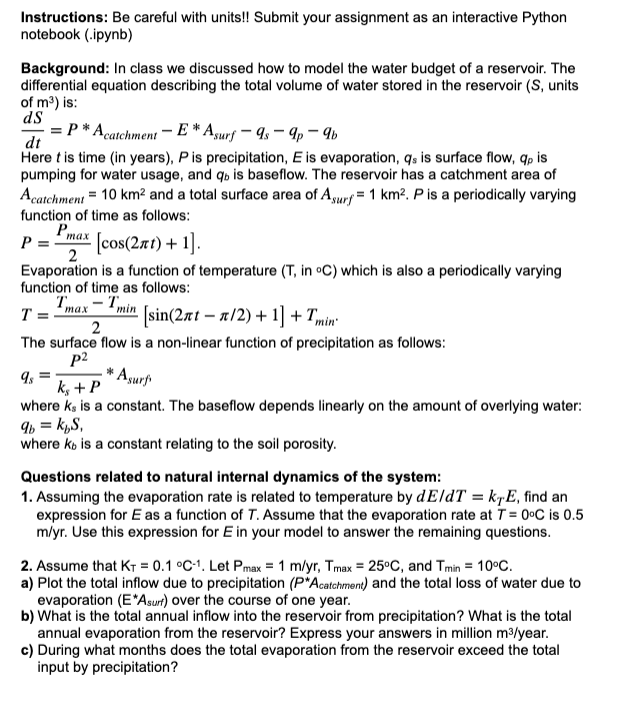

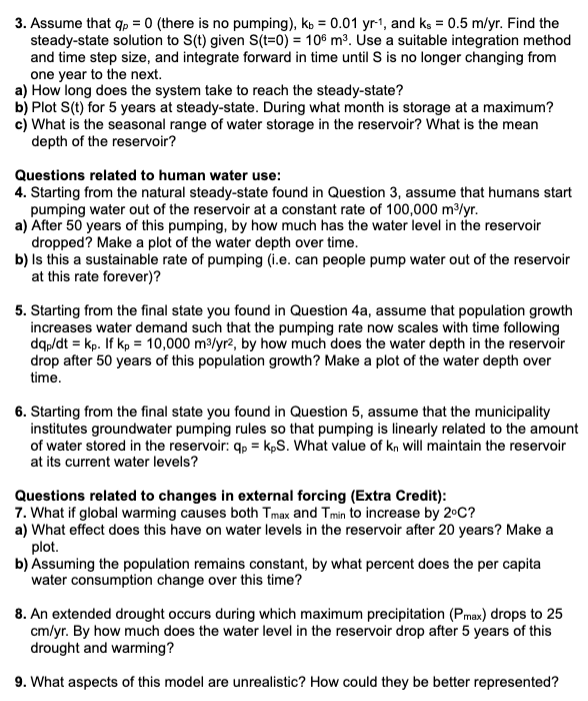

## Question 1: 
<font color="orange">
Assuming the evaporation rate is related to temperature by  dE/dT = k_T E,  find an expression for E as a function of T. Assume that the evaporation rate at T = 0°C is 0.5 m/yr. Use this expression for E in your model to answer the remaining questions.
</font>

In [ ]:
# given
kT = 0.1        # assume k_T = 0.1 °C⁻¹, given by question 2 
E0 = 0.5        # m/yr at T=0°C

# Evaporation rate as a function of temperature
def E(T_vals):
    return E0 * np.exp(kT * T_vals) # T_vals function is also a periodically varying function of time, and will be defined as below

## Question 2: 
<font color="orange">
Assume that k_T = 0.1 °C⁻¹. Let P_max = 1 m/yr, T_max = 25°C, and T_min = 10°C.  

a).Plot the total inflow due to precipitation (P * A_catchment) and the total loss of water due to evaporation (E * A_surf) over the course of one year.
</font>

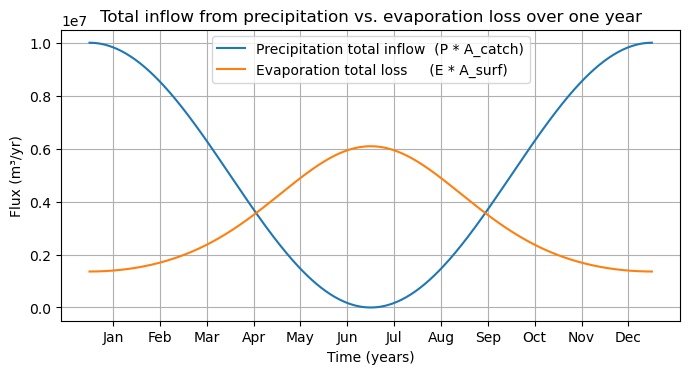

In [28]:
# define the input paramter
kT = 0.1          # per degree C
E0 = 0.5          # m/yr at T = 0°C
P_max = 1.0       # m/yr
T_max = 25.0      # °C
T_min = 10.0      # °C
A_catch = 10e6    # 10 km² -> m²
A_surf = 1e6      # 1 km²  -> m²

# define the function
def P(t):
    return P_max / 2 * (np.cos(2 * np.pi * t) + 1)
def T(t):
    return (T_max - T_min) / 2 * (np.sin(2 * np.pi * t - np.pi/2) + 1) + T_min
def E(T):
    return E0 * np.exp(kT * T)

# calculate the whole year
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_positions = np.arange(1/24, 1, 1/12)
t = np.linspace(0, 1, 365)       # per day/one year
P_vals = P(t)                    # m/yr
T_vals = T(t)                    # °C
E_vals = E(T_vals)               # m/yr

# transfter into volumn：m³/yr
P_in  = P_vals * A_catch         # P * A_catchment
E_out = E_vals * A_surf          # E * A_surf

# figure
plt.figure(figsize=(7, 4))
plt.plot(t, P_in,  label="Precipitation total inflow  (P * A_catch)")
plt.plot(t, E_out, label="Evaporation total loss     (E * A_surf)")
plt.xlabel("Time (years)")
plt.ylabel("Flux (m³/yr)")
plt.xticks(month_positions, month_labels)
plt.title("Total inflow from precipitation vs. evaporation loss over one year")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 <font color="orange">b).What is the total annual inflow into the reservoir from precipitation? What is the total annual evaporation from the reservoir? Express your answers in million m³/year.</font>


In [30]:
dt = t[1] - t[0]

total_P = np.sum(P_in) * dt
total_E = np.sum(E_out) * dt

print("Total annual precipitation inflow (million m3/yr):", total_P/1e6)
print("Total annual evaporation (million m3/yr):", total_E/1e6)

Total annual precipitation inflow (million m3/yr): 5.027472527472527
Total annual evaporation (million m3/yr): 3.3001049109551976


 <font color="orange">c)During what months does the total evaporation from the reservoir exceed the total input by precipitation?</font>

From the figure a), we can easily find from <font color='red'>April</font> to <font color='red'>September</font>, the evaporation is higher than precipiation.

## Question 3: 
<font color="orange">
Assume that q_p = 0 (there is no pumping), k_b = 0.01 yr⁻¹, and k_s = 0.5 m/yr. Find the steady-state solution to S(t) given S(t=0) = 10⁶ m³. Use a suitable integration method and time step size, and integrate forward in time until S is no longer changing from one year to the next.

a).How long does the system take to reach the steady-state?
</font>

<font color="orange">b).Plot S(t) for 5 years at steady-state. During what month is storage at a maximum?</font>

<font color="orange">c).What is the seasonal range of water storage in the reservoir? What is the mean depth of the reservoir?</font>

## Question 4: 
<font color="orange">
Starting from the natural steady-state found in Question 3, assume that humans start pumping water out of the reservoir at a constant rate of 100,000 m³/yr.

a).After 50 years of this pumping, by how much has the water level in the reservoir dropped? Make a plot of the water depth over time.
</font>

<font color="orange">b).Is this a sustainable rate of pumping (i.e. can people pump water out of the reservoir at this rate forever)?</font>

## Question 5: 
<font color="orange">
Starting from the final state you found in Question 4a, assume that population growth increases water demand such that the pumping rate now scales with time following  dq_p/dt = k_p.  If k_p = 10,000 m³/yr², by how much does the water depth in the reservoir drop after 50 years of this population growth? Make a plot of the water depth over time.
</font>

## Question 6: 
<font color="orange">
Starting from the final state you found in Question 5, assume that the municipality institutes groundwater pumping rules so that pumping is linearly related to the amount of water stored in the reservoir: q_p = k_n S. What value of k_n will maintain the reservoir at its current water levels?
</font>

## Extra Credit Question 7: 
<font color="orange">
What if global warming causes both T_max and T_min to increase by 2°C?

a).What effect does this have on water levels in the reservoir after 20 years? Make a plot.
</font>

<font color="orange">
b).Assuming the population remains constant, by what percent does the per capita water consumption change over this time?
</font>

## Extra Credit Question 8: 
<font color="orange">
An extended drought occurs during which maximum precipitation (P_max) drops to 25 cm/yr. By how much does the water level in the reservoir drop after 5 years of this drought and warming?
</font>

## Extra Credit Question 9: 
<font color="orange">
What aspects of this model are unrealistic? How could they be better represented?
</font>